# Numerische Verifizierung der von Neumann Stbilitätsanalyse

In [11]:
# wie immer, lass uns einige wichtige Module importieren
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

---

## Aufgabe 8.1

Bearbeiten Sie Ihre Jupyter Notebooks der Übungen 5 und 6, so dass diese die Advektions-Diffusionsgleichung 

$$ \phi_{/t} + U \phi_{/x} = \nu \phi_{/xx} \qquad \qquad (1)$$

mit dem in Aufgabenteil 8.1 beschrieben Verfahren lösen. 

Definieren Sie zuerst die notwendigen Parameter. Verwenden Sie hierfür $N_x = 20$ Kontrollvolumina (KV), um das Lösungsgebiet zu diskretisieren. Nehmen Sie zusätzlich folgende Parameter an: $U=1$, $L_x=1$. Wählen Sie $\Delta t$ und $\nu$ nach der Stabilitätsanalyse von Augfgabe 8.2, so dass das Verfahren stabil ist.

In [12]:
##########
# INPUTS #
##########

L = 1.0         # [m] Länge des Gebiets
U = 1.0         # [m/s] Advektionsgeschwindigkeit

Nt = 20         # Anzahl der zu berechnende Zeitschritte
Nx = 20         # Anzahl von Zellen / Kontrollvolumina (KV)
beta = 0.4      # dimensionsloser Parameter alfa/(dx^2/dt) = nu * dt / dx^2 = beta
sigma = 0.4     # dimensionsloser Parameter U/(dx/dt) = U * dt / dx = sigma

Definieren Sie die Vektoren $\mathbf{x}$ der Koordinaten von den Mittelpunkten der Kontrollvolumina (KV), $\mathbf{\phi}$ der unbekannten Lösungsvariable, $\mathbf{F}$ der Flüsse an den KV Grenzflächen. Nachdem Sie in dem oberen Block $L$ und $N_x$ definiert haben, können Sie jetzt die Breite $\Delta x$ des Kontrollvolumens auch definieren.  Die Zeitschrittweite $\Delta t$ und der Diffusionskoeffizienten $\nu$ werden aus den dimensionslosen Parametern $\beta$ und $\sigma$ hergeleitet.

In [13]:
dx = L/Nx                       # [m] Auflösung
dt = sigma * dx / U             # [s] Zeitschritt
nu = beta * dx**2 / dt          # [m^2/s] Diffusionskoeffizient

x = (np.arange(Nx)+0.5)*dx      # Gitter (Vektor der Koordinate von den KV Mittelpunkten)
x_I = (np.arange(Nx+1))*dx      # Gitter (Vektor der Koordinate der KV Grenzfflächen: nicht nötig für Berechnung!)
phi = np.zeros(Nx)              # Vektor der im KV gemittelten phi-Werte
F = np.zeros(Nx+1)              # Vektor der Flüsse an den KV Grenzflächen

Initialisieren Sie den Lösungsvektor $\mathbf{\phi}$ mit der in Aufgabenteil 8.1a) vorgegebenen Anfangsbedingung

$$ \phi(x,t=0) = A \cos (k_x x) \, . \qquad \qquad (2)$$

Wählen Sie als Wellenzahl $k_x=2\pi$ und $A=1$.

In [14]:
# Wir speichern die Anfangsbedingung in dem Vektor phi
phi += np.cos(2*np.pi*x)

Iterieren Sie die Berechnung der Lösung im nächsten Zeitschritt für eine Anzahl von Zeitschritten $N_t=200$. Dieser Schritt beinhaltet folgende Operationen:
        
* Iterieren Sie über alle KV Grenzflächen, um die advektive und diffusive Flüsse zu berechnen und in den Vektor $\mathbf{F}$ zu speichern. 
* Iterieren Sie über alle KV, um die Lösung durch die Bilanz der Flüsse zu aktualisieren.

In [15]:
# Zuerst definieren wir die Zeit
# vor der Integration sind wir beim Zeitpunkt null
t=0
# Wir starten die zeitliche Integration
# als For-Schleife für Nt Zeitschritte
for n in range(Nt):
    # Wir aktualisieren die Zeit
    t = t + dt
    # Wir berechnen die Flüsse: Achten Sie auf 
    # die periodischen Randbedingungen! 
    for iF in range(Nx+1):
        # Wir berechnen die diffusive Flüsse (grad(phi)*n) 
        # mit den zentralen finiten Differenzen
        F[iF] = -nu*(phi[iF % Nx]-phi[iF-1])/dx
        # und dann die advektive Flüsse (U*phi) 
        # mit linearen Interpolation
        F[iF] += 0.5*U*(phi[iF % Nx] + phi[iF-1])
    # Wir aktualisieren die Lösung
    # durch die Bilanz der Flüsse
    for i in range(Nx):
        phi[i] += (dt/dx)*(F[i]-F[i+1])


Bevor wir die Lösung darstellen, ist es sinnvoll, die analytische exakte Lösung des Problems zu implementieren. Das machen wir mit einer Funktion. 

In [16]:
# Wir definieren die Funktion, mit der wir die exakten Lösung definieren 
def phi_exakt(t,x,A,nu,U,kx):
    phi_exakt=A*np.cos(kx*(x-U*t))*np.exp(-nu*t*kx**2)
    return phi_exakt
    

# Wir können jetzt die exakte Lösung berechnen
x_ex = np.linspace(0,L,Nx)
phi_ex = phi_exakt(t,x_ex,1.0,nu,U,2*np.pi)

Stellen Sie das Ergebnis dar und überprüfen Sie diese, in dem Sie es mit dem erwarteten Ergebnis vergleichen. 

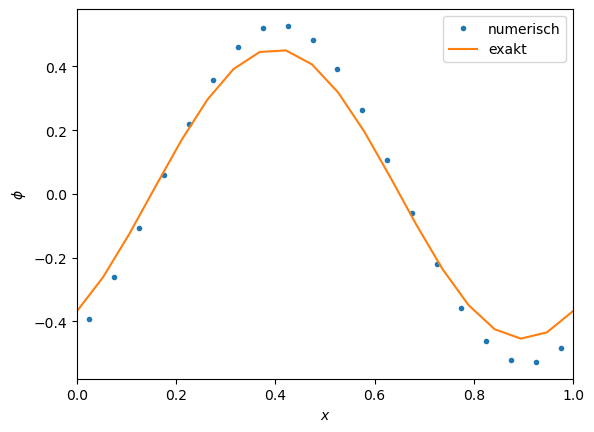

In [17]:
# Wir öffnen eine neue Abbildung
plt.figure()
# wir stellen die exakte und numerische Lösung dar
plt.plot(x,phi,'.',label='numerisch')
plt.plot(x_ex,phi_ex,label='exakt')
# wir setzen Grenzen für die x- und y-Achse:
# Wir sehen gleich wozu wir das brauchen
#plt.ylim([-1,1])
plt.xlim([0,1])
# wir zeigen die Legende an
plt.legend()
# und beschriften die Achsen
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.show()

Verifizieren Sie, dass Ihr Ergebnis bezüglich der Stabilität des numerischen Verfahren aus Aufgabe 8.2 korrekt ist und sich in die Stabilitätseigenschaften des Verfahrens tatsächlich wiederspielt. Um dies zu erreichen, variieren Sie in ihrem Jupyter Notebook die Parameter $\sigma = U / (\Delta x / \Delta t)$ und $\beta = \nu / (\Delta x^2 / \Delta t)$ im folgenden Bereich

$$ \sigma = 0 \cdots 1.5,  \qquad \beta = 0 \cdots 1.5 \, $$
    
und beobachten Sie das Verhalten der Lösung. Für welche Werte von $(\sigma, \beta)$ ist die Lösung stabil? 

Hinweis: Sie können eine Fehlernorm zur von Ihnen berechneten analytischen Lösung verwenden, um in Ihrem Jupyter Notebook die Stabilität der Lösung zu bewerten. Erhöhen Sie hierfür die Anzahl von Zeitschritte zu $N_t=1000$.

In [18]:
# Gleich werden wir das obere Problem für unterschiedliche Werte von sigma und beta lösen müssen
#
# Es bietet sich also an, die Definition des Problems 
# und seine Lösung in eine Funktion zu implementieren
#
def solve_advdiff(Nx,Nt,U,L,sigma,beta):
    # zuerst definieren wir die abhängigen Parameter
    dx = L/Nx                       # [m] Auflösung
    # wenn sigma=0, dann muss U=0 und wir können den Zeitschritt nicht aus 
    # sigma berechnen. In diesem Fall müssen wir den Zeitschritt 
    # vorgeben
    if sigma==0:
        U  = 0
        dt = 1e-3
    else:
        dt = sigma * dx / U             # [s] Zeitschritt
    nu = beta * dx**2 / dt          # [m^2/s] Diffusionskoeffizient
 
    # und die Vektoren der Koordinaten und Lösungsvektoren
    x = (np.arange(Nx)+0.5)*dx      # Gitter (Vektor der Koordinate von den KV Mittelpunkten)
    x_I = (np.arange(Nx+1))*dx      # Gitter (Vektor der Koordinate der KV Grenzfflächen: nicht nötig für Berechnung!)
    phi = np.zeros(Nx)              # Vektor der im KV gemittelten phi-Werte
    F = np.zeros(Nx+1)              # Vektor der Flüsse an den KV Grenzflächen

    # Wir speichern die Anfangsbedingung in dem Vektor phi
    phi = np.cos(2*np.pi*x)
    
    # Wenn beide beta und sigma null sind, 
    # dann passiert nichts in der Gleichung: wir haben
    # weder diffusion noch advektion
    if sigma==0 and beta==0:
        return x, phi, phi

    # Zuerst definieren wir die Zeit
    # vor der Integration sind wir beim Zeitpunkt null
    t=0
    # Wir starten die zeitliche Integration
    # als For-Schleife für Nt Zeitschritte
    for n in range(Nt):
        # Wir aktualisieren die Zeit
        t = t + dt
        # Wir berechnen die Flüsse: Achten Sie auf 
        # die periodischen Randbedingungen! 
        for iF in range(Nx+1):
            # Wir berechnen die diffusive Flüsse (grad(phi)*n) 
            # mit den zentralen finiten Differenzen
            F[iF] = -nu*(phi[iF % Nx]-phi[iF-1])/dx
            # und dann die advektive Flüsse (U*phi) 
            # mit linearen Interpolation
            F[iF] += 0.5*U*(phi[iF % Nx] + phi[iF-1])
        # Wir aktualisieren die Lösung
        # durch die Bilanz der Flüsse
        for i in range(Nx):
            phi[i] += (dt/dx)*(F[i]-F[i+1])
  
    # Wir können gleich auch die analytische Lösung berechnen
    phi_ex = phi_exakt(t,x,1.0,nu,U,2*np.pi)
    
    # Die Funktion soll die Lösung und die Koordinate zurückgeben
    return x,phi,phi_ex
    
    
# Wir können eine weitere Funktion definieren, mit der wir durch den Vergleich
# mit der analytischen Lösung bestimmen können, ob die Lösung stabil war
def isStabil(phi,phi_ex):
    # Berechne den maximalen Fehler 
    Emax = np.max(np.abs(phi_ex-phi))
    return Emax<10

Jetzt sind wir bereit, um tatsächlich den Parameterraum zu untesuchen

In [19]:
sigmas = np.linspace(0,1.5,20)   # Parameterraum sigma
betas  = np.linspace(0,1.5,20)   # Parameterraum beta
# Array von "dtype=bool" mit True-Werte, wenn die Kombination (sigma,beta) stabil ist
stable = np.zeros((sigmas.size,betas.size),dtype=bool)   
# Wir erhähren die Anzahl von Zeitschritten
Nt = 1000

# Loop für alle sigma
for iS,sigma in enumerate(sigmas):
    # Loop für alle betas
    for iB,beta in enumerate(betas):
        # Löse die Gleichung
        x,phi,phi_ex = solve_advdiff(Nx,Nt,U,L,sigma,beta)
        # Kontrolliere die Stabilität
        stable[iS,iB] = isStabil(phi, phi_ex)

C:\Users\rp7459\AppData\Local\Temp\ipykernel_26896\1527580542.py:47: RuntimeWarning: overflow encountered in scalar divide
  F[iF] = -nu*(phi[iF % Nx]-phi[iF-1])/dx
C:\Users\rp7459\AppData\Local\Temp\ipykernel_26896\1527580542.py:50: RuntimeWarning: invalid value encountered in scalar add
  F[iF] += 0.5*U*(phi[iF % Nx] + phi[iF-1])
C:\Users\rp7459\AppData\Local\Temp\ipykernel_26896\1527580542.py:54: RuntimeWarning: overflow encountered in scalar subtract
  phi[i] += (dt/dx)*(F[i]-F[i+1])
C:\Users\rp7459\AppData\Local\Temp\ipykernel_26896\1527580542.py:47: RuntimeWarning: overflow encountered in scalar subtract
  F[iF] = -nu*(phi[iF % Nx]-phi[iF-1])/dx
C:\Users\rp7459\AppData\Local\Temp\ipykernel_26896\1527580542.py:54: RuntimeWarning: overflow encountered in scalar multiply
  phi[i] += (dt/dx)*(F[i]-F[i+1])


Stellen Sie das Ergebnis des Aufgabenteils 8.3b) in einem Diagramm dar, welches auf der Ordinate den Parameter $\beta$ und auf der Abszisse den Parameter $\sigma$ zeigt. Kennzeichnen Sie mit dem Symbol $\times$ die $(\sigma,\beta)$-Kombinationen, die zu einer stabilen Lösung geführt haben. Die instabile Fälle werden ansonsten mit dem Symbol $\circ$ gekennzeichnet. Stellen im selben Diagramm auch die Kurven der neutralen Stabilitätsgrenze, so wie sie diese in Aufgabe 8.2 bestimmt haben. Stimmen die numerischen Ergebnisse mit Ihrer Erwartung aus der Stabilitätsanalyse überein?

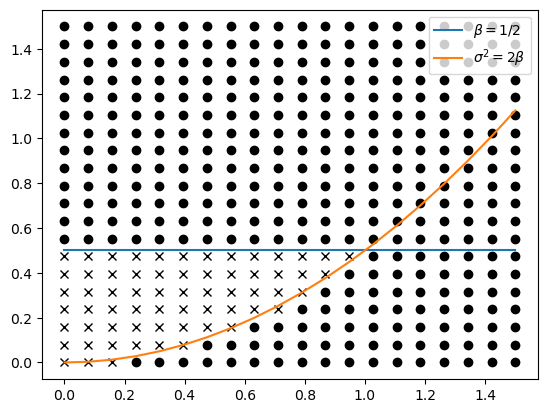

In [20]:
# Wir öffnen eine neue Abbildung
plt.figure()
# Wir gehe die Fälle durch und plotten sie
# Loop für alle sigma
for iS,sigma in enumerate(sigmas):
    # Loop für alle betas
    for iB,beta in enumerate(betas):
        # Fall-Unterscheidung in Abhängigkeit
        # der Stabilität
        if stable[iS,iB]:   #wenn stabil
            # Plotten mit x
            plt.plot(sigma,beta,'kx')
        else:               #wenn instabil
            # Plotten mit o
            plt.plot(sigma,beta,'ko')
# Wir plotten auch die Kurven aus der Stabilitätsanalyse
plt.plot(sigmas, 0*sigmas + 0.5, label=r'$\beta=1/2$')
plt.plot(sigmas, 0.5*sigmas**2, label=r'$\sigma^2=2 \beta$')
# Wir plotten eie Legende
plt.legend()
plt.show()